<a href="https://colab.research.google.com/github/Tyton25/machine_learning/blob/master/sterlings_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [2]:
# X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 20.0, 23.0, 26.0, 29.0])
# y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0, 33.0, 36.0, 39.0])
# y = tf.range(3, 40, 3, dtype=tf.float32)
X = tf.range(-100, 100, 3, dtype=tf.float32)
y = X + 10
# X, y

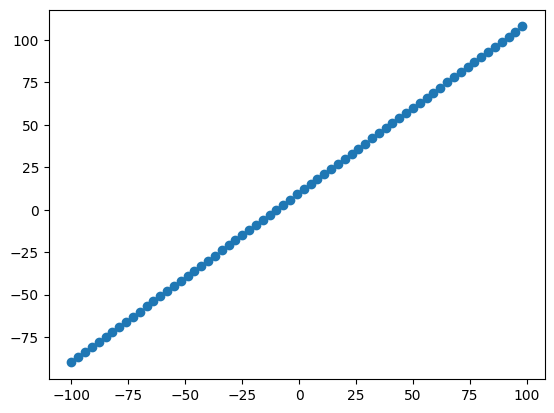

In [3]:
plt.scatter(X,y)

In [4]:
from os import name
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer1"),
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer2"),
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer3"),
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer4"),
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer5"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

model.compile(loss=tf.keras.losses.mae,
              # optimizer=tf.keras.optimizers.SGD(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=1000, verbose=0)
# model.fit(X, y, epochs=100, verbose=0)

In [5]:
model.predict([20.0])

1/1 [==============================] - 0s 125ms/step


array([[30.181604]], dtype=float32)

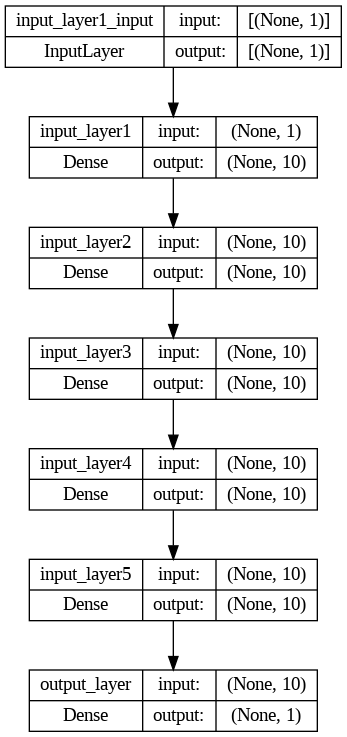

In [6]:
plot_model(model=model, show_shapes=True)

In [7]:
x_length = len(X)
x_length

67

In [8]:
x_idx = int(x_length * 0.8)
x_idx

53

In [9]:
X_train = X[:x_idx]
y_train = y[:x_idx]

In [10]:
X_test = X[x_idx:]
y_test = y[x_idx:]

In [11]:
len(X_train), len(X_test), len(y_train), len(y_test)

(53, 14, 53, 14)

In [12]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 23ms/step


array([[ 69.68525 ],
       [ 72.72399 ],
       [ 75.76273 ],
       [ 78.80147 ],
       [ 81.84022 ],
       [ 84.87895 ],
       [ 87.917694],
       [ 90.956436],
       [ 93.99517 ],
       [ 97.03391 ],
       [100.07266 ],
       [103.111404],
       [106.15013 ],
       [109.18889 ]], dtype=float32)

In [13]:
y_test

<tf.Tensor: shape=(14,), dtype=float32, numpy=
array([ 69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,  99.,
       102., 105., 108.], dtype=float32)>

In [14]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="g", label="Training data")

  plt.scatter(test_data, test_labels, c="b", label="Test data")

  plt.scatter(test_data, predictions, c="r", label="Predictions")

  plt.legend();

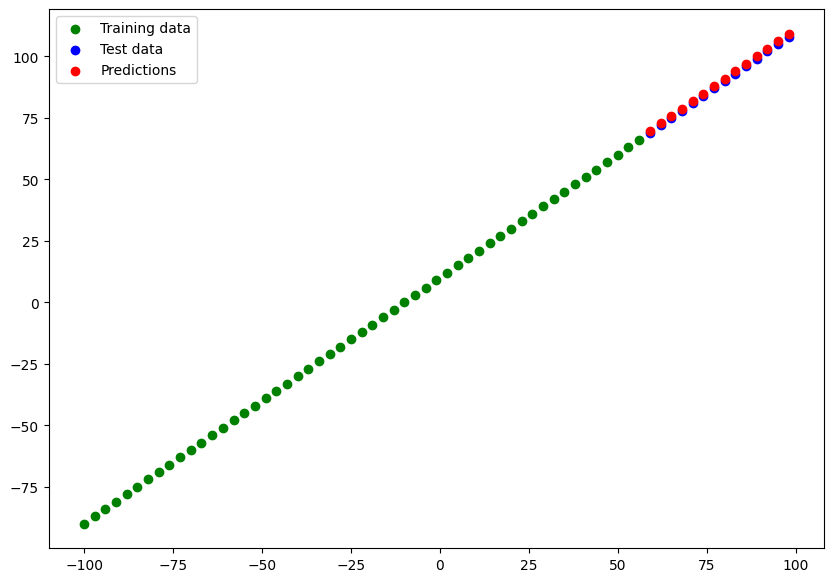

In [15]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

In [16]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 195ms/step - loss: 0.9371 - mae: 0.9371


[0.9370645880699158, 0.9370645880699158]

In [17]:
mae = tf.keras.losses.mae(y_true=y_test,
                          y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.9370651>

In [18]:
mse = tf.keras.losses.mse(y_true=y_test,
                          y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.90248>

In [19]:
def mae(test_vals, pred_vals):
  return tf.keras.losses.mae(y_true=test_vals,
                             y_pred=tf.squeeze(pred_vals)).numpy()

In [20]:
def mse(test_vals, pred_vals):
  return tf.keras.losses.mse(y_true=test_vals,
                             y_pred=tf.squeeze(pred_vals)).numpy()

***Buile Model_1

In [21]:
# Set seed
tf.random.set_seed(42)

# 1. Create Model_1 for Evaluation
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile Model_1
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Train Model_1
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [22]:
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 [==============================] - 0s 49ms/step


array([[ 65.554596],
       [ 68.82005 ],
       [ 72.08551 ],
       [ 75.35097 ],
       [ 78.61643 ],
       [ 81.88189 ],
       [ 85.14735 ],
       [ 88.4128  ],
       [ 91.67826 ],
       [ 94.943726],
       [ 98.20918 ],
       [101.47464 ],
       [104.7401  ],
       [108.00556 ]], dtype=float32)

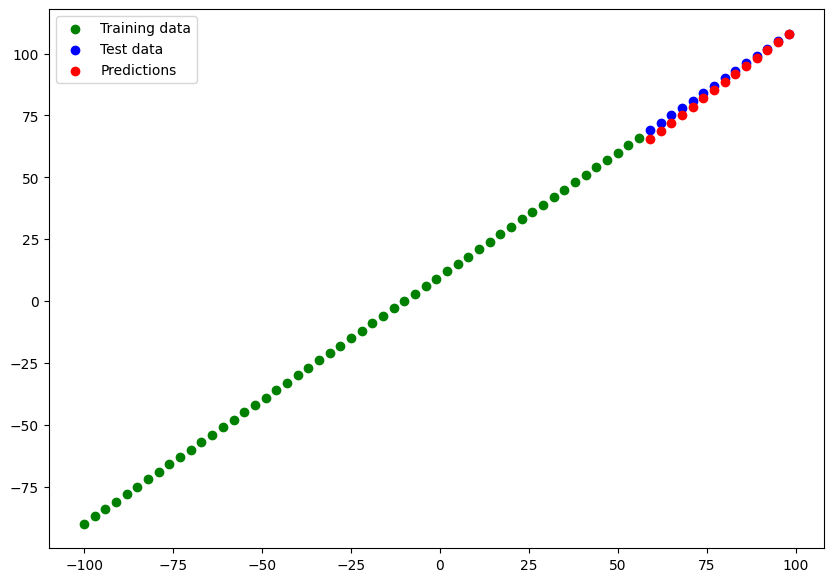

In [23]:
plot_predictions(predictions=y_pred_1)

In [24]:
# Create model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(1.7207184, 4.103249)

** Build `model_2`
* 2 dense layers trained for 100 epochs

In [25]:
# Set seed
tf.random.set_seed(42)

# 1. Create model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Train model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)

In [26]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 [==============================] - 0s 57ms/step


array([[58.9267  ],
       [61.761936],
       [64.597176],
       [67.43241 ],
       [70.267654],
       [73.10289 ],
       [75.938126],
       [78.77336 ],
       [81.608604],
       [84.44383 ],
       [87.279076],
       [90.11431 ],
       [92.94955 ],
       [95.78478 ]], dtype=float32)

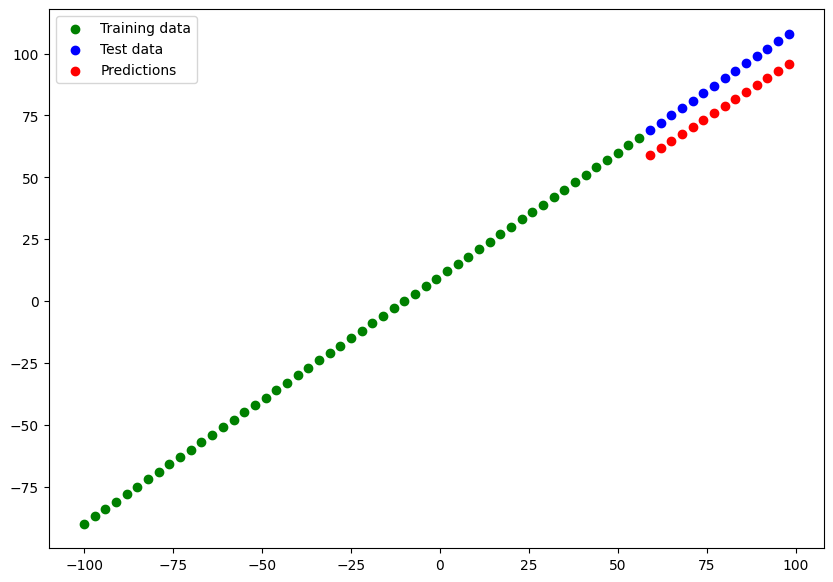

In [27]:
plot_predictions(predictions=y_pred_2)

In [28]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(11.144257, 124.6356)

*** Build `model_3`
* 2 layers trained for 500 epochs

In [29]:
from keras.engine.training import optimizer
# Set seed
tf.random.set_seed(42)

# 1. Create model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile model_3
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Train model_3
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

In [30]:
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 [==============================] - 0s 88ms/step


array([[ 71.02065 ],
       [ 74.33018 ],
       [ 77.639694],
       [ 80.9492  ],
       [ 84.25872 ],
       [ 87.568245],
       [ 90.877754],
       [ 94.18729 ],
       [ 97.496796],
       [100.806305],
       [104.11583 ],
       [107.42535 ],
       [110.734856],
       [114.04438 ]], dtype=float32)

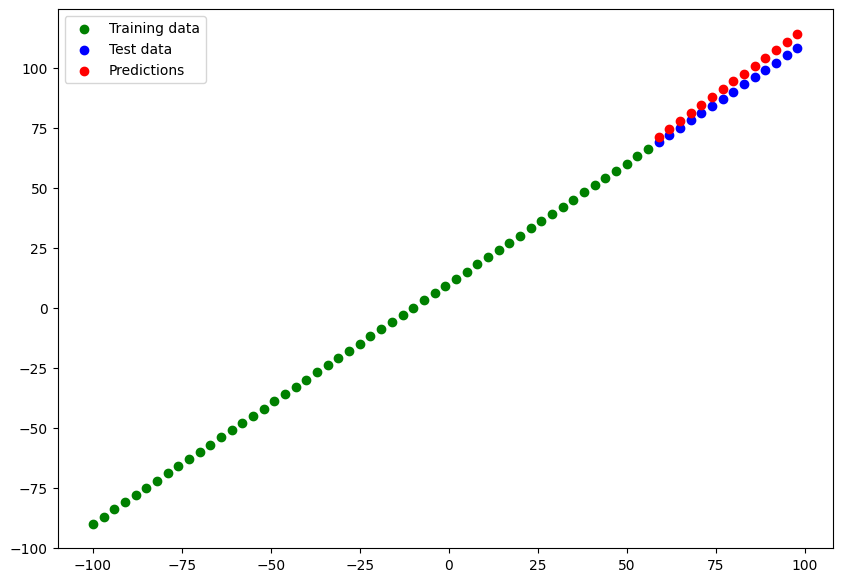

In [31]:
plot_predictions(predictions=y_pred_3)

In [32]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(4.0325174, 17.81796)

### Save Models

In [33]:
model_2.save("best_model_SavedModel_format")

*** Compare Results of `Models`

In [34]:
model_2.save("best_model_HDF5_format.h5")

### Load Models

In [35]:
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               200       
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               200       
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compare model_2 predictions with that of loaded_SavedModel_format
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 79ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [38]:
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]
                 ]

results_df = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])

results_df

,Model,MAE,MSE
0,model_1,1.720718,4.103249
1,model_2,11.144257,124.635597
2,model_3,4.032517,17.817961


In [39]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

## Preprocessing Data (Normalization & Standardization)

In [40]:
insurance_df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [41]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # transform all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y values
X = insurance_df.drop("charges", axis=1)
y = insurance_df["charges"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [42]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [43]:
# Build a neural network model to train on our normalized data
# 1. set seed
tf.random.set_seed(42)

# 2. Build model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 3. Compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 4. Fit model
insurance_model.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [44]:
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3437.6748 - mae: 3437.6748


[3437.6748046875, 3437.6748046875]

In [45]:
y_pred = insurance_model.predict(X_test_normal)
y_pred

9/9 [==============================] - 0s 3ms/step


array([[ 9359.992  ],
       [ 6070.857  ],
       [34367.375  ],
       [ 9261.99   ],
       [22095.15   ],
       [ 5827.3726 ],
       [ 1082.003  ],
       [13563.635  ],
       [ 3537.4053 ],
       [10233.825  ],
       [25475.543  ],
       [ 7786.4893 ],
       [ 4261.386  ],
       [30841.504  ],
       [33302.074  ],
       [30511.486  ],
       [10777.191  ],
       [30446.56   ],
       [ 8739.843  ],
       [28727.812  ],
       [ 3962.8552 ],
       [ 8069.2563 ],
       [  687.61414],
       [ 3196.5947 ],
       [10941.783  ],
       [11388.153  ],
       [12434.969  ],
       [ 4893.781  ],
       [ 9977.505  ],
       [  460.65103],
       [ 8361.254  ],
       [11812.268  ],
       [ 2004.7823 ],
       [ 5109.7524 ],
       [ 2951.04   ],
       [ 8901.682  ],
       [ 1876.7177 ],
       [ 7982.3257 ],
       [31395.453  ],
       [26940.244  ],
       [ 3088.3396 ],
       [ 2320.7737 ],
       [11806.411  ],
       [11518.628  ],
       [ 5617.7617 ],
       [11

In [60]:
PI = np.pi
EULER = np.e

In [61]:
EULER, EULER**2

(2.718281828459045, 7.3890560989306495)

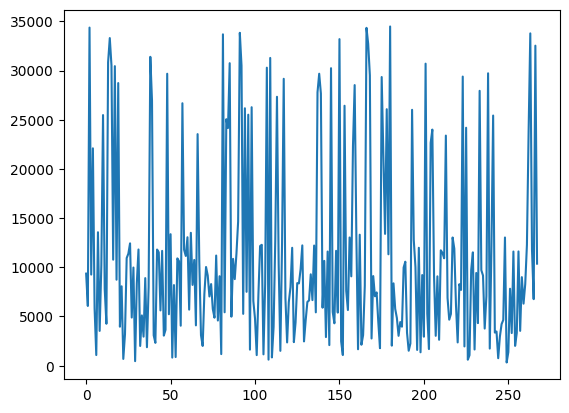

In [59]:
plt.plot(y_pred)